In [7]:
# import libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# data location
file_location = r'./all_names_eng_wales.xlsx'

In [12]:
# import data into dataframe
df = pd.read_excel(file_location)
print(df.head(5))

  Gender   Name    2020    2019    2018    2017    2016    2015    2014  \
0   Male      A  3848.0  2104.0  3959.0  3996.0  2335.0  2020.0  2964.0   
1   Male  A JAY  2960.0     NaN  3011.0  1923.0  2335.0  2707.0  3895.0   
2   Male   A.J.     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3   Male  AABAN  3848.0  3937.0  3412.0  2324.0  4810.0  2319.0  1281.0   
4   Male  AABID  4608.0  3937.0  3959.0  3996.0  4810.0  3004.0  4632.0   

     2013  ...    2005    2004  2003    2002    2001    2000    1999    1998  \
0  2660.0  ...     NaN     NaN   NaN     NaN  3134.0     NaN     NaN     NaN   
1  2403.0  ...  3849.0  1878.0   NaN  2636.0  3134.0     NaN     NaN     NaN   
2     NaN  ...     NaN     NaN   NaN     NaN     NaN     NaN  2943.0     NaN   
3  1706.0  ...     NaN     NaN   NaN     NaN     NaN     NaN     NaN     NaN   
4     NaN  ...     NaN     NaN   NaN     NaN  3134.0  2142.0     NaN  2901.0   

   1997  1996  
0   NaN   NaN  
1   NaN   NaN  
2   NaN   NaN  
3   

In [14]:
# transform dataframe into a flat structure
all_columns = df.columns
date_columns = []
for column in all_columns:
    if column == 'Gender' or column == 'Name':
        continue
    else:
        date_columns.append(column)
        
df_flat = pd.melt(df, id_vars=['Gender', 'Name'], value_vars=date_columns)
df_flat.rename({'variable': 'Year', 'value': 'Name Count'}, axis=1, inplace=True)

In [15]:
# clean data
# remove all capital names in dataframe
df_flat['Name'] = df_flat['Name'].str.title()
# replace all nan as 0
df_flat['Name Count'] = df_flat['Name Count'].fillna(0)
# remove all names with 0 count
zero_names = list(dict.fromkeys(df_flat[df_flat['Name Count'] == 0]['Name'].tolist()))
df_flat = df_flat[~df_flat['Name'].isin(zero_names)]
print(df_flat.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62050 entries, 5 to 944842
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      62050 non-null  object 
 1   Name        62050 non-null  object 
 2   Year        62050 non-null  object 
 3   Name Count  62050 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.4+ MB
None


In [16]:
# calculate the difference in name change
# sort the dataframe correctly
df_flat.sort_values(by=['Name', 'Year'], ascending=True, inplace=True)
# actual change
df_flat['diff_count'] = df_flat.groupby(['Gender', 'Name'])['Name Count'].diff().fillna(0)
# percentage change
df_flat['diff_perc'] = df_flat.groupby(['Gender', 'Name'])['Name Count'].pct_change().fillna(0)

In [17]:
# find the top 20 % change
top20_perc = df_flat.sort_values(by=['diff_perc'], ascending=False)
top20_perc = top20_perc.head(20)
top_20_perc_list = list(dict.fromkeys(top20_perc['Name'].tolist()))
print(top_20_perc_list)

['Stevie', 'Luc', 'Acacia', 'Anneliese', 'Zulekha', 'Haashim', 'Marika', 'Rylan', 'Bonita', 'Celina', 'Salih', 'Kyrah', 'Kayley', 'Jessica', 'Sophie', 'Chloe', 'Harry', 'Raza', 'Llewelyn']


In [18]:
# find the top 20 count change
top20_count = df_flat.sort_values(by=['diff_count'], ascending=False)
top20_count = top20_count.head(20)
top20_count_list = list(dict.fromkeys(top20_count['Name'].tolist()))
print(top20_count_list)

['Bonita', 'Zulekha', 'Kayley', 'Safina', 'Yvonne', 'Catarina', 'Avril', 'Michal', 'Zaira', 'Luc', 'Rowena', 'Anneliese', 'Stevie', 'Warda', 'Gwyneth', 'Reema', 'Latifah', 'Sanya', 'Xenia']


       Gender   Name  Year  Name Count  diff_count  diff_perc
916293   Male  Lewis  1996        24.0         0.0   0.000000
878498   Male  Lewis  1997        21.0        -3.0  -0.125000
840703   Male  Lewis  1998        18.0        -3.0  -0.142857
802908   Male  Lewis  1999        13.0        -5.0  -0.277778
765113   Male  Lewis  2000        13.0         0.0   0.000000
727318   Male  Lewis  2001        10.0        -3.0  -0.230769
689523   Male  Lewis  2002        14.0         4.0   0.400000
651728   Male  Lewis  2003        13.0        -1.0  -0.071429
613933   Male  Lewis  2004        14.0         1.0   0.076923
576138   Male  Lewis  2005        19.0         5.0   0.357143
538343   Male  Lewis  2006        21.0         2.0   0.105263
500548   Male  Lewis  2007        16.0        -5.0  -0.238095
462753   Male  Lewis  2008        14.0        -2.0  -0.125000
424958   Male  Lewis  2009        21.0         7.0   0.500000
387163   Male  Lewis  2010        27.0         6.0   0.285714
349368  

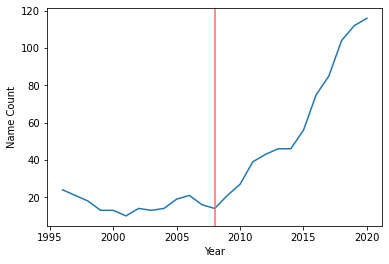

In [20]:
# check names
name = 'Lewis'
name_selection_df = df_flat[df_flat['Name'] == name]
print(name_selection_df)
# plot
g = sns.lineplot(data=name_selection_df, x='Year', y='Name Count')
g.axvline(2008, color='#FF6B6B')
plt.show()